# Predição do Preço das Ações da Apple

FURB - Ciência de Dados 2020/2 - Giulio Giovanella

O objetivo desse trabalho é criar um modelo de rede neural recorrente que tente prever os preços futuros das ações da Apple (APPL). Para isso foi usada uma rede recorrente Long Short-Term Memory (LSTM), seguinte a proposta de Usman Malik em "Time Series Analysis with LSTM using Python's Keras Library", disponível em: https://stackabuse.com/time-series-analysis-with-lstm-using-pythons-keras-library/


Utilizando os dados fornacidos pelo Yahoo Finance do histórico de preços e indicadores dos preços das ações da Apple, disponíveis em: https://finance.yahoo.com/quote/AAPL/history?period1=1514764800&period2=1517356800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true



In [4]:
#importando as dependências do projeto
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

**Carregando e preparando os dados**
Os dados baixados do Yahoo Finance estão em formato csv, e são referentes ao gráfico diário da cotação.

**<p>-> remoção da coluna do preço de fechamento**
**<p>-> normalização**
**<p>-> reshape**

Cabeçalho dos dados

 Date; Open; High; Low; Close; Adj Close; Volume.
 
 Data; valor abertura; valor máximo; valor mínima; valor de fechamento; Adj Close;  volume de negociações

In [ ]:
#carregando o dataset do arquivo csv baixado do Yahoo Finance
apple_training_complete = pd.read_csv('dataset/AAPL_2017.csv')

In [28]:
apple_training_complete[:5]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.926661,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.713015,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.247477,594333600
3,2013-01-07,18.642857,18.903572,18.400000,18.710714,16.151909,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761072,16.195379,458707200


In [ ]:
#cabeçalho dos dados
# Date  Open    High    Low    Close   Adj Close   Volume
# data; valor abertura; valor máximo; valor mínima; valor de fechamento; asd;  volume de negociações

#separando coluna de abertura
apple_training_processed = apple_training_complete.iloc[:, 1:2].values

In [34]:
apple_training_processed.shape

(1259, 1)

In [35]:
apple_training_processed[0]

array([19.779285])

In [37]:
#normalizando os dados para a faixa de 0 - 1
scaler = MinMaxScaler(feature_range = (0, 1))
apple_training_scaled = scaler.fit_transform(apple_training_processed)
apple_training_scaled[:5]

array([[0.19795893],
       [0.19086893],
       [0.17784675],
       [0.15997852],
       [0.16858436]])

In [39]:
#alterando o formato dos dados para se adequar a rede neural
features_set = []
labels = []
for i in range(60, 1259):
    features_set.append(apple_training_scaled[i-60:i, 0])
    j = apple_training_scaled[i, 0]
    labels.append(j)

features_set[1]

array([0.19086893, 0.17784675, 0.15997852, 0.16858436, 0.16057535,
       0.1677966 , 0.15878493, 0.13691816, 0.13169017, 0.12732156,
       0.14602531, 0.13195272, 0.1391621 , 0.14423489, 0.08597521,
       0.07605636, 0.05951303, 0.08418478, 0.08239436, 0.08237053,
       0.08491289, 0.07870613, 0.06693724, 0.08176177, 0.0898544 ,
       0.10268564, 0.10566962, 0.10926236, 0.09458104, 0.09137027,
       0.09653854, 0.08728814, 0.08321795, 0.06926477, 0.07314397,
       0.07863455, 0.06666273, 0.07216524, 0.06693724, 0.05971596,
       0.04754118, 0.03999762, 0.05555025, 0.0436023 , 0.0499284 ,
       0.04986871, 0.0568513 , 0.04831701, 0.05354504, 0.05963238,
       0.06383385, 0.08537841, 0.08289567, 0.0743018 , 0.0795059 ,
       0.09157317, 0.09246841, 0.08174984, 0.07382435, 0.06437099])

In [42]:
#convertendo os dados e os rótulos para arrays numpy, tipos primitivos do python não são aceitos
features_set, labels = np.array(features_set), np.array(labels)

features_set.shape

(1199, 60)

In [43]:
#convertendo para o formato aceito pela rede neural
#registros, dados, 1
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

features_set.shape

(1199, 60, 1)

In [6]:
#criando a rede neural recorrente
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
checkpoint_file = "checkpoint"

In [14]:
#carregando os pesos da rede neural salvos no arquivo de checkpoint
checkpoint_filepath = 'checkpoints/{}.ckpt'.format(checkpoint_file)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
filepath=checkpoint_filepath,
save_weights_only=True,
monitor='val_acc',
mode='max',
save_best_only=False,
verbose=1)   

model.load_weights(checkpoint_filepath)

#treinando a rede neural 
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/3
1199/1199 [==============================] - 6s 5ms/step - loss: 7.4675e-04
Epoch 2/3
1199/1199 [==============================] - 6s 5ms/step - loss: 6.7134e-04
Epoch 3/3
1199/1199 [==============================] - 6s 5ms/step - loss: 7.3403e-04


In [12]:
#selecionando dados para teste
test_dataset_name = 'AAPL_jan_2018'

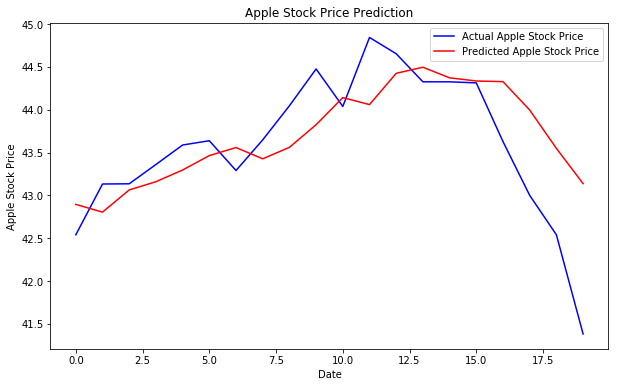

In [15]:
#carregando dataset de testes
apple_testing_complete = pd.read_csv('dataset/{}.csv'.format(test_dataset_name))

apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)

test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values


test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

predictions = model.predict(test_features)

predictions = scaler.inverse_transform(predictions)


plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()


<p>O gráfico acima contém o resultado do treinamento com 200 épocas para o dataset com os dados do ano de 2017, e teste com os dados de Janeiro de 2018.

<p>Analisando o gráfico este parece apresentar uma precisão muito boa em relação aos movimentos de subida e descida acontecidas no mês de Janeiro de 2018. Com base na linha vermelha, que marca a previsão da rede, o investidor poderia entrar comprado no começo do mês com a contação a 43 dólares, e posto uma ordem de venda na faixa dos 44 dólares, obtendo assim lucro de 2.43% aproximadamente.

## Testando com dados de 2019

<p>Pegando dados de 2019 para treinar a rede, e testando com dados de janeiro de 2020

In [50]:
apple_training_complete = pd.read_csv('dataset/AAPL_2019.csv')
apple_training_complete.shape


(251, 7)

In [55]:
#cabeçalho dos dados
# Date  Open    High    Low    Close   Adj Close   Volume
# data; valor abertura; valor máximo; valor mínima; valor de fechamento; asd;  volume de negociações

#extraindo coluna de abertura de preço
apple_training_processed = apple_training_complete.iloc[:, 1:2].values
    
#normalizando os dados
scaler = MinMaxScaler(feature_range = (0, 1))
apple_training_scaled = scaler.fit_transform(apple_training_processed)
    
#alterando o formato dos dados para comportar a LSTM
features_set = []
labels = []
    
for i in range(60, 251):
    features_set.append(apple_training_scaled[i-60:i, 0])
    j = apple_training_scaled[i, 0]
    labels.append(j)

features_set, labels = np.array(features_set), np.array(labels)


features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))


checkpoint_file = "checkpoint_2020"

#carregando os pesos da rede neural salvos no arquivo de checkpoint
checkpoint_filepath = 'checkpoints/{}.ckpt'.format(checkpoint_file)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
filepath=checkpoint_filepath,
save_weights_only=True,
monitor='val_acc',
mode='max',
save_best_only=False,
verbose=1)   

model.load_weights(checkpoint_filepath)

#treinando a rede neural 
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
191/191 [==============================] - 1s 5ms/step - loss: 7.7676e-04
Epoch 2/100
191/191 [==============================] - 1s 5ms/step - loss: 8.2855e-04
Epoch 3/100
191/191 [==============================] - 1s 5ms/step - loss: 8.7173e-04
Epoch 4/100
191/191 [==============================] - 1s 5ms/step - loss: 9.8016e-04
Epoch 5/100
191/191 [==============================] - 1s 5ms/step - loss: 7.7882e-04
Epoch 6/100
191/191 [==============================] - 1s 5ms/step - loss: 8.1107e-04
Epoch 7/100
191/191 [==============================] - 1s 5ms/step - loss: 7.3214e-04
Epoch 8/100
191/191 [==============================] - 1s 5ms/step - loss: 0.0010
Epoch 9/100
191/191 [==============================] - 1s 6ms/step - loss: 7.7799e-04
Epoch 10/100
191/191 [==============================] - 1s 5ms/step - loss: 8.7306e-04
Epoch 11/100
191/191 [==============================] - 1s 5ms/step - loss: 7.8672e-04
Epoch 12/100
191/191 [==============================] - 

191/191 [==============================] - 1s 5ms/step - loss: 6.5659e-04
Epoch 96/100
191/191 [==============================] - 1s 6ms/step - loss: 7.4409e-04
Epoch 97/100
191/191 [==============================] - 1s 5ms/step - loss: 6.9337e-04
Epoch 98/100
191/191 [==============================] - 1s 5ms/step - loss: 9.9904e-04
Epoch 99/100
191/191 [==============================] - 1s 5ms/step - loss: 9.8009e-04
Epoch 100/100
191/191 [==============================] - 1s 5ms/step - loss: 8.0519e-04


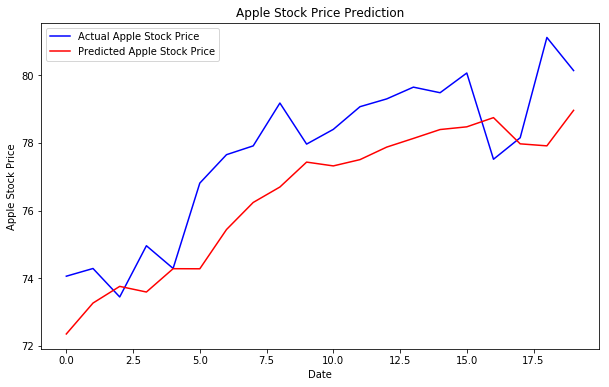

In [54]:
test_dataset_name = "AAPL_jan_2020"

#carregando dataset de testes
apple_testing_complete = pd.read_csv('dataset/{}.csv'.format(test_dataset_name))

apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)

test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values


test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

predictions = model.predict(test_features)

predictions = scaler.inverse_transform(predictions)


plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

<p> Novamente temos um resultado muito bom da rede. Tendo entrado no começo do mês a cotação de 74 dolares, e posicionando a ordem de venda nos 78 dolares, como sugere como preço máximo na linha vermelho de predição, o investidor teria ganhos de 5,4% de rentabilidade.